In [1]:
# Housekeeping
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import statsmodels.api as sm
import scipy as sp
from IPython.core.interactiveshell import InteractiveShell
import requests
import re
import json
from bs4 import BeautifulSoup
from ast import literal_eval
import seaborn as sn
import matplotlib.pyplot as plt
#InteractiveShell.ast_node_interactivity = "all"

In [2]:
carsales = pd.read_excel(r"C:\Users\Kiran\Documents\University\Economics Yr 3\My Courses\EC3310 Coding\GithubRepo\EVDataAnalysis\veh0203 (2).xlsx")
carsales.dropna(0)
EV_carsales = carsales[["Year", "Hybrid Electric 1", "Plug-in Hybrid Electric 2", "Battery Electric", 
                           "Range-Extended Electric 3", "Fuel Cell Electric 4"]]
EV_carsales1 = EV_carsales.dropna(0)
EV_carsales1 = EV_carsales1.drop([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
EV_carsales1 = EV_carsales1.astype({"Year":int})
EV_carsales1["totalEvCarSales"] = EV_carsales1.iloc[:, 1:].sum(axis=1)
EV_carsales1 = EV_carsales1.set_index("Year")
EV_carsales1

,Hybrid Electric 1,Plug-in Hybrid Electric 2,Battery Electric,Range-Extended Electric 3,Fuel Cell Electric 4,totalEvCarSales
Year,,,,,,
2008,47.036,0.000,1.325,0.000,0.008,48.369
2009,61.344,0.000,1.454,0.000,0.008,62.806
2010,82.059,0.313,1.545,0.000,0.008,83.925
2011,102.037,0.527,2.612,0.004,0.005,105.185
2012,123.959,1.097,4.068,0.518,0.011,129.653
2013,151.272,1.686,6.167,0.892,0.011,160.028
2014,182.381,7.871,12.111,2.157,0.016,204.536
2015,221.822,23.822,20.466,3.780,0.026,269.916
2016,268.542,49.096,29.081,5.505,0.034,352.258


In [3]:
EV_carsales1 = EV_carsales1.drop(['Hybrid Electric 1', 'Plug-in Hybrid Electric 2', 'Battery Electric', 'Range-Extended Electric 3', 'Fuel Cell Electric 4'], axis=1)
EV_carsales1

,totalEvCarSales
Year,
2008,48.369
2009,62.806
2010,83.925
2011,105.185
2012,129.653
2013,160.028
2014,204.536
2015,269.916
2016,352.258


In [4]:
df = pd.read_excel(r"C:\Users\Kiran\Documents\University\Economics Yr 3\My Courses\EC3310 Coding\GithubRepo\EVDataAnalysis\table.4.1.2.xlsx")
df = df.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,28])
Fuel_prices = df.set_index("Year").astype(int)
Fuel_prices = Fuel_prices.rename(columns={"Premium Unleaded ":"Premium Unleaded"})
Fuel_prices

,Premium Unleaded,Diesel
Year,,
2008,107,117
2009,99,103
2010,116,119
2011,133,138
2012,135,141
2013,134,140
2014,127,133
2015,111,114
2016,108,110


In [5]:
Variables_df = pd.concat([Fuel_prices, EV_carsales1], axis=1)
Variables_df

,Premium Unleaded,Diesel,totalEvCarSales
Year,,,
2008,107,117,48.369
2009,99,103,62.806
2010,116,119,83.925
2011,133,138,105.185
2012,135,141,129.653
2013,134,140,160.028
2014,127,133,204.536
2015,111,114,269.916
2016,108,110,352.258


In [6]:
disposable_income = pd.read_csv(r"C:\Users\Kiran\Documents\University\Economics Yr 3\My Courses\EC3310 Coding\GithubRepo\EVDataAnalysis\MWB7-100420.csv")
disposable_income = disposable_income.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,29])
disposable_income = disposable_income.rename(columns={"Title":"Year" , "UK Real net national disposable income per capita CVM SA":"Disposable income"})
disposable_income = disposable_income.set_index("Year")
disposable_income.index = disposable_income.index.astype(int)
disposable_income

,Disposable income
Year,
2008,24271
2009,22967
2010,23471
2011,23574
2012,23383
2013,23565
2014,24237
2015,24681
2016,24956


In [7]:
Variables_df = pd.concat([Variables_df, disposable_income], axis=1)
Variables_df

,Premium Unleaded,Diesel,totalEvCarSales,Disposable income
Year,,,,
2008,107,117,48.369,24271
2009,99,103,62.806,22967
2010,116,119,83.925,23471
2011,133,138,105.185,23574
2012,135,141,129.653,23383
2013,134,140,160.028,23565
2014,127,133,204.536,24237
2015,111,114,269.916,24681
2016,108,110,352.258,24956


In [8]:
df = pd.read_excel(r"C:\Users\Kiran\Documents\University\Economics Yr 3\My Courses\EC3310 Coding\GithubRepo\EVDataAnalysis\GBP_to_USD_exchange_rate.xlsx")
df = df.rename(columns=df.iloc[0])
ExRate = df.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,34,35])
ExRate = ExRate.set_index("Year")
ExRate

,Average,Year Open,Year High,Year Low,Year Close,Annual
Year,,,,,,
2008,1.85,1.98,2.03,1.44,1.46,-0.2626
2009,1.57,1.45,1.7,1.37,1.62,0.1096
2010,1.55,1.61,1.64,1.43,1.54,-0.0494
2011,1.6,1.55,1.67,1.54,1.55,0.0065
2012,1.59,1.57,1.63,1.53,1.63,0.0516
2013,1.56,1.63,1.66,1.48,1.66,0.0184
2014,1.65,1.64,1.72,1.55,1.56,-0.0602
2015,1.53,1.54,1.59,1.46,1.47,-0.0577
2016,1.35,1.47,1.49,1.21,1.23,-0.1605


In [9]:
Variables_df["GBP/USD exchange rate"] = ExRate["Average"]
Variables_df

,Premium Unleaded,Diesel,totalEvCarSales,Disposable income,GBP/USD exchange rate
Year,,,,,
2008,107,117,48.369,24271,1.85
2009,99,103,62.806,22967,1.57
2010,116,119,83.925,23471,1.55
2011,133,138,105.185,23574,1.6
2012,135,141,129.653,23383,1.59
2013,134,140,160.028,23565,1.56
2014,127,133,204.536,24237,1.65
2015,111,114,269.916,24681,1.53
2016,108,110,352.258,24956,1.35


In [10]:
WorldbankPL = requests.get("http://api.worldbank.org/v2/sources/2/country/gbr/series/NY.GDP.PCAP.CD?end=2018&locations=GB&start=2008&format=json")
print(WorldbankPL.status_code)

PL_dict = json.loads(WorldbankPL.content)
data = PL_dict['source']['data']
filtered = []
for d in data:
    for i in range(2008,2019):
        if d['variable'][2]['value'] == str(i):
            filtered.append(d)
print(filtered)

200
[{'variable': [{'concept': 'Country', 'id': 'GBR', 'value': 'United Kingdom'}, {'concept': 'Series', 'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per capita (current US$)'}, {'concept': 'Time', 'id': 'YR2018', 'value': '2018'}], 'value': 42943.9022698053}, {'variable': [{'concept': 'Country', 'id': 'GBR', 'value': 'United Kingdom'}, {'concept': 'Series', 'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per capita (current US$)'}, {'concept': 'Time', 'id': 'YR2017', 'value': '2017'}], 'value': 40361.4173832159}, {'variable': [{'concept': 'Country', 'id': 'GBR', 'value': 'United Kingdom'}, {'concept': 'Series', 'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per capita (current US$)'}, {'concept': 'Time', 'id': 'YR2016', 'value': '2016'}], 'value': 41074.1672796521}, {'variable': [{'concept': 'Country', 'id': 'GBR', 'value': 'United Kingdom'}, {'concept': 'Series', 'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per capita (current US$)'}, {'concept': 'Time', 'id': 'YR2015', 'value': '2015'}], 'value': 44966.1019252665},

In [11]:
Gdp_percap = []
for c in filtered:
    Gdp_percap.append(c['value'])
    Gdp_percap.reverse()
    
Gdp_percap = np.round(Gdp_percap, decimals=2)
Gdp_percap

array([47287.  , 39435.84, 42462.71, 47417.64, 41074.17, 42943.9 ,
       40361.42, 44966.1 , 43444.56, 42038.5 , 38713.14])

In [12]:
Variables_df["GDP per capita in ($)"] = Gdp_percap
Variables_df = Variables_df.round(2)
Variables_df

,Premium Unleaded,Diesel,totalEvCarSales,Disposable income,GBP/USD exchange rate,GDP per capita in ($)
Year,,,,,,
2008,107,117,48.37,24271,1.85,47287.00
2009,99,103,62.81,22967,1.57,39435.84
2010,116,119,83.92,23471,1.55,42462.71
2011,133,138,105.18,23574,1.6,47417.64
2012,135,141,129.65,23383,1.59,41074.17
2013,134,140,160.03,23565,1.56,42943.90
2014,127,133,204.54,24237,1.65,40361.42
2015,111,114,269.92,24681,1.53,44966.10
2016,108,110,352.26,24956,1.35,43444.56


In [13]:
Gvt_subsidy = [0, 0, 0, 5000, 5000, 5000, 5000, 5000, 4500, 4500, 3500]

Variables_df["Government EV subsidy in (£)"] = Gvt_subsidy
Variables_df

,Premium Unleaded,Diesel,totalEvCarSales,Disposable income,GBP/USD exchange rate,GDP per capita in ($),Government EV subsidy in (£)
Year,,,,,,,
2008,107,117,48.37,24271,1.85,47287.00,0
2009,99,103,62.81,22967,1.57,39435.84,0
2010,116,119,83.92,23471,1.55,42462.71,0
2011,133,138,105.18,23574,1.6,47417.64,5000
2012,135,141,129.65,23383,1.59,41074.17,5000
2013,134,140,160.03,23565,1.56,42943.90,5000
2014,127,133,204.54,24237,1.65,40361.42,5000
2015,111,114,269.92,24681,1.53,44966.10,5000
2016,108,110,352.26,24956,1.35,43444.56,4500


In [14]:
oil_volume = pd.read_excel(r"C:\Users\Kiran\Documents\University\Economics Yr 3\My Courses\EC3310 Coding\GithubRepo\EVDataAnalysis\Oil_Production___Trade_since_1890.xls")
oil_volume = oil_volume.rename(columns={"Unnamed: 0":"Year"})
oil_volume = oil_volume.dropna(how = 'all')
oil_volume = oil_volume.astype({"Year":int}).set_index("Year")
oil_volume

,Imports,Total Indeginous production,Landward Indeginous production,Feed stocks (7),Exports,Refinery throughput,Refinery output (4,Exports.1,Imports.1,Inland deliveries (4),Crude oil thousand tonnes,Oil products (5),Total (5),imports to ref throughput ratio,production to ref. throughput,to indigenous production,inland deliveries percentage,Unnamed: 18
Year,,,,,,,,,,,,,,,,,,
1890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.151568,452.442641,NaN,NaN,-448.291073,NaN,NaN,NaN,NaN,NaN,1890.0
1891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.561568,506.462641,NaN,NaN,-501.901073,NaN,NaN,NaN,NaN,NaN,1891.0
1892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.971568,560.482641,NaN,NaN,-555.511073,NaN,NaN,NaN,NaN,NaN,1892.0
1893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.381568,614.502641,NaN,NaN,-609.121073,NaN,NaN,NaN,NaN,NaN,1893.0
1894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.791568,668.522641,NaN,NaN,-662.731073,NaN,NaN,NaN,NaN,NaN,1894.0
1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.201568,722.542641,NaN,NaN,-716.341073,NaN,NaN,NaN,NaN,NaN,1895.0
1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.611568,776.562641,NaN,NaN,-769.951073,NaN,NaN,NaN,NaN,NaN,1896.0
1897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.021568,830.582641,NaN,NaN,-823.561073,NaN,NaN,NaN,NaN,NaN,1897.0
1898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.431568,884.602641,NaN,NaN,-877.171073,NaN,NaN,NaN,NaN,NaN,1898.0


In [15]:
Uk_crude_volume = oil_volume[["Imports", "Total Indeginous production"]]
Uk_crude_volume = Uk_crude_volume.loc[[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]]
Uk_crude_volume["Totat Crude Production"] = Uk_crude_volume.sum(axis=1)
Uk_crude_volume

,Imports,Total Indeginous production,Totat Crude Production
Year,,,
2008,60334.860264,71788.836080,132123.696344
2009,55002.260848,68198.546716,123200.807564
2010,55064.002099,62961.614280,118025.616379
2011,58092.299344,51972.425352,110064.724696
2012,60475.714323,44560.807430,105036.521754
2013,58966.737730,41100.801028,100067.538759
2014,53637.546186,40327.753083,93965.299270
2015,50599.003301,45698.120531,96297.123832
2016,48789.057923,47872.067568,96661.125491


In [16]:
UK_crude_volume= np.asarray(Uk_crude_volume['Totat Crude Production'])
Variables_df["UK crude oil volume (Thousand Tonnes)"] = UK_crude_volume
Variables_df

,Premium Unleaded,Diesel,totalEvCarSales,Disposable income,GBP/USD exchange rate,GDP per capita in ($),Government EV subsidy in (£),UK crude oil volume (Thousand Tonnes)
Year,,,,,,,,
2008,107,117,48.37,24271,1.85,47287.00,0,132123.696344
2009,99,103,62.81,22967,1.57,39435.84,0,123200.807564
2010,116,119,83.92,23471,1.55,42462.71,0,118025.616379
2011,133,138,105.18,23574,1.6,47417.64,5000,110064.724696
2012,135,141,129.65,23383,1.59,41074.17,5000,105036.521754
2013,134,140,160.03,23565,1.56,42943.90,5000,100067.538759
2014,127,133,204.54,24237,1.65,40361.42,5000,93965.299270
2015,111,114,269.92,24681,1.53,44966.10,5000,96297.123832
2016,108,110,352.26,24956,1.35,43444.56,4500,96661.125491


In [17]:
url = ("https://www.inflation.eu/inflation-rates/great-britain/historic-inflation/cpi-inflation-great-britain.aspx")
page = requests.get(url).text
soup = BeautifulSoup(page, "html.parser")

link = soup.find_all('table')
tables = link[14]
trs = tables.find_all('tr')
inflationRate = []

for index,i in enumerate(trs):
    tds = trs[index].find_all("td")
    infRate = (tds[len(tds)-1]).text
    infRate2 = (tds[1]).text
    inflationRate.append({'date': (tds[0]).text ,'value': literal_eval("'%s'" % infRate2)})
    inflationRate.append({'date': (tds[len(tds)-2]).text ,'value': literal_eval("'%s'" % infRate)})
print(inflationRate)

[{'date': '\xa0average inflation', 'value': 'inflation'}, {'date': 'average inflation', 'value': 'inflation\xa0'}, {'date': '\xa0CPI Great Britain 2020', 'value': '1.74\xa0%'}, {'date': 'CPI Great Britain 2010', 'value': '2.49\xa0%\xa0'}, {'date': '\xa0CPI Great Britain 2019', 'value': '1.74\xa0%'}, {'date': 'CPI Great Britain 2009', 'value': '1.97\xa0%\xa0'}, {'date': '\xa0CPI Great Britain 2018', 'value': '2.29\xa0%'}, {'date': 'CPI Great Britain 2008', 'value': '3.52\xa0%\xa0'}, {'date': '\xa0CPI Great Britain 2017', 'value': '2.56\xa0%'}, {'date': 'CPI Great Britain 2007', 'value': '2.39\xa0%\xa0'}, {'date': '\xa0CPI Great Britain 2016', 'value': '1.01\xa0%'}, {'date': 'CPI Great Britain 2006', 'value': '2.45\xa0%\xa0'}, {'date': '\xa0CPI Great Britain 2015', 'value': '0.37\xa0%'}, {'date': 'CPI Great Britain 2005', 'value': '2.02\xa0%\xa0'}, {'date': '\xa0CPI Great Britain 2014', 'value': '1.45\xa0%'}, {'date': 'CPI Great Britain 2004', 'value': '1.35\xa0%\xa0'}, {'date': '\xa0CPI

In [18]:
CPI  = pd.DataFrame(inflationRate)
CPI = CPI.drop([0,1], axis=0)
CPI["date"] = CPI["date"].str.replace(r'\D+', '') 
CPI

,date,value
2,2020,1.74 %
3,2010,2.49 %
4,2019,1.74 %
5,2009,1.97 %
6,2018,2.29 %
7,2008,3.52 %
8,2017,2.56 %
9,2007,2.39 %
10,2016,1.01 %
11,2006,2.45 %


In [19]:
avg_infaltion_UK = CPI.drop([CPI.index[0], CPI.index[1], CPI.index[2], CPI.index[3], CPI.index[4], CPI.index[5], CPI.index[6], CPI.index[18], CPI.index[19]])
avg_infaltion_UK = avg_infaltion_UK.rename(columns={"date":"Year"}).set_index("Year")
avg_infaltion_UK

,value
Year,
2007,2.39 %
2016,1.01 %
2006,2.45 %
2015,0.37 %
2005,2.02 %
2014,1.45 %
2004,1.35 %
2013,2.29 %
2003,1.38 %


In [20]:
inflation_rate = np.asarray(avg_infaltion_UK["value"])
Variables_df["UK average inflation rate"] = inflation_rate
Variables_df

,Premium Unleaded,Diesel,totalEvCarSales,Disposable income,GBP/USD exchange rate,GDP per capita in ($),Government EV subsidy in (£),UK crude oil volume (Thousand Tonnes),UK average inflation rate
Year,,,,,,,,,
2008,107,117,48.37,24271,1.85,47287.00,0,132123.696344,2.39 %
2009,99,103,62.81,22967,1.57,39435.84,0,123200.807564,1.01 %
2010,116,119,83.92,23471,1.55,42462.71,0,118025.616379,2.45 %
2011,133,138,105.18,23574,1.6,47417.64,5000,110064.724696,0.37 %
2012,135,141,129.65,23383,1.59,41074.17,5000,105036.521754,2.02 %
2013,134,140,160.03,23565,1.56,42943.90,5000,100067.538759,1.45 %
2014,127,133,204.54,24237,1.65,40361.42,5000,93965.299270,1.35 %
2015,111,114,269.92,24681,1.53,44966.10,5000,96297.123832,2.29 %
2016,108,110,352.26,24956,1.35,43444.56,4500,96661.125491,1.38 %


In [21]:
Variables_df["UK average inflation rate"] = Variables_df["UK average inflation rate"].map(lambda x: ''.join([i for i in x if i.isdigit()]))
Variables_df

,Premium Unleaded,Diesel,totalEvCarSales,Disposable income,GBP/USD exchange rate,GDP per capita in ($),Government EV subsidy in (£),UK crude oil volume (Thousand Tonnes),UK average inflation rate
Year,,,,,,,,,
2008,107,117,48.37,24271,1.85,47287.00,0,132123.696344,239
2009,99,103,62.81,22967,1.57,39435.84,0,123200.807564,101
2010,116,119,83.92,23471,1.55,42462.71,0,118025.616379,245
2011,133,138,105.18,23574,1.6,47417.64,5000,110064.724696,037
2012,135,141,129.65,23383,1.59,41074.17,5000,105036.521754,202
2013,134,140,160.03,23565,1.56,42943.90,5000,100067.538759,145
2014,127,133,204.54,24237,1.65,40361.42,5000,93965.299270,135
2015,111,114,269.92,24681,1.53,44966.10,5000,96297.123832,229
2016,108,110,352.26,24956,1.35,43444.56,4500,96661.125491,138


In [22]:
cols = list(Variables_df.columns)
a, b = cols.index('Premium Unleaded'), cols.index('totalEvCarSales')
cols[b], cols[a] = cols[a], cols[b]
Variables_df = Variables_df[cols]
Variables_df

,totalEvCarSales,Diesel,Premium Unleaded,Disposable income,GBP/USD exchange rate,GDP per capita in ($),Government EV subsidy in (£),UK crude oil volume (Thousand Tonnes),UK average inflation rate
Year,,,,,,,,,
2008,48.37,117,107,24271,1.85,47287.00,0,132123.696344,239
2009,62.81,103,99,22967,1.57,39435.84,0,123200.807564,101
2010,83.92,119,116,23471,1.55,42462.71,0,118025.616379,245
2011,105.18,138,133,23574,1.6,47417.64,5000,110064.724696,037
2012,129.65,141,135,23383,1.59,41074.17,5000,105036.521754,202
2013,160.03,140,134,23565,1.56,42943.90,5000,100067.538759,145
2014,204.54,133,127,24237,1.65,40361.42,5000,93965.299270,135
2015,269.92,114,111,24681,1.53,44966.10,5000,96297.123832,229
2016,352.26,110,108,24956,1.35,43444.56,4500,96661.125491,138


y = Variables_df["totalEvCarSales"]
x = Variables_df[[Variables_df.columns[-8:]]

reg_model = sm.OLS(y.astype(float), x.astype(float)) 
reg_model.df_model 
reg_model.fit().summary()

In [23]:
electricityPrices = pd.read_csv(r"C:\Users\Kiran\Documents\University\Economics Yr 3\My Courses\EC3310 Coding\GithubRepo\electricityprices.csv")
electricityPrices['Year'] = electricityPrices['Month beginning'].str[-4:]
del electricityPrices['Month beginning']
electricityPrices = DataFrame({'Average Electricity Price': electricityPrices.groupby('Year')['Price'].mean().round(3)})
electricityPrices.index = electricityPrices.index.astype(int)
electricityPrices = electricityPrices.iloc[:-2]
electricityPrices

,Average Electricity Price
Year,
2010,44.959
2011,48.203
2012,45.210
2013,50.796
2014,42.432
2015,40.745
2016,42.628
2017,46.312
2018,58.234


y = Variables_df["totalEvCarSales"]
x = Variables_df[["Diesel", "Premium Unleaded", "GDP per capita in ($)", "Government EV subsidy in (£)", "UK crude oil volume (Thousand Tonnes)", "UK average inflation rate", "Average Electricity Price"]]

reg_model = sm.OLS(y.astype(float), x.astype(float)) 
reg_model.df_model 
reg_model.fit().summary()

In [24]:
busFares = pd.read_excel(r"C:\Users\Kiran\Documents\University\Economics Yr 3\My Courses\EC3310 Coding\GithubRepo\busfares.xlsx")
busFares = busFares.drop(range(13))
busFares = busFares.iloc[:-1]
busFares = busFares[['Year','Great Britain']]
busFares = busFares.set_index('Year')
busFares.columns = ['Bus Fare Cost']
busFares

,Bus Fare Cost
Year,
2008,113.356652
2009,123.078460
2010,128.952627
2011,135.192095
2012,143.355417
2013,150.127342
2014,154.740813
2015,159.710623
2016,162.633562


Variables_df = pd.concat([Variables_df, electricityPrices, busFares], axis=1)
Variables_df = Variables_df.fillna(0)
Variables_df

y = Variables_df["totalEvCarSales"]
x = Variables_df[["Diesel", "Premium Unleaded", "GDP per capita in ($)", "Government EV subsidy in (£)", "UK crude oil volume (Thousand Tonnes)", "UK average inflation rate", "Average Electricity Price", "Bus Fare Cost"]]

reg_model = sm.OLS(y.astype(float), x.astype(float)) 
reg_model.df_model 
reg_model.fit().summary()

In [25]:
charger_data = {'Slow':[1325, 1611, 2126, 2448, 2228, 2451, 2743, 3293], 
        'Fast': [178,1193,3309,4734,5946,7143,8754,11459], 
        'Rapid':[34,79,284,844,1710,2153,2663,4025],
        'Ultra-rapid':[None,None,None,None,None,None,None,341]}
df = pd.DataFrame(charger_data, index=[2011,2012,2013,2014,2015,2016,2017,2018])
df["Sum"] = df.sum(axis=1).astype(int)
df

,Slow,Fast,Rapid,Ultra-rapid,Sum
2011,1325,178,34,NaN,1537
2012,1611,1193,79,NaN,2883
2013,2126,3309,284,NaN,5719
2014,2448,4734,844,NaN,8026
2015,2228,5946,1710,NaN,9884
2016,2451,7143,2153,NaN,11747
2017,2743,8754,2663,NaN,14160
2018,3293,11459,4025,341.0,19118


In [26]:
Variables_df['Charging Connectors'] = df['Sum']
Variables_df['ULEZ Variable'] = 1
range_data = [None, 244, 84, 73, 118, 79, 81, 114, 128, 177, 190]
Variables_df['Range of Electric Vehicle (miles)'] = range_data

C:\Users\Kiran\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Kiran\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Kiran\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [27]:
electricityAvailable = pd.read_excel(r"C:\Users\Kiran\Documents\University\Economics Yr 3\My Courses\EC3310 Coding\GithubRepo\electricityavailable.xlsx")
electricityAvailable = electricityAvailable.set_index("Year")
electricityAvailable

,Electricity Available
Year,
2008,378.202088
2009,358.166648
2010,364.397421
2011,353.909397
2012,353.776343
2013,350.935054
2014,338.252761
2015,339.618494
2016,337.652537


In [28]:
Variables_df = pd.concat([Variables_df, busFares], axis=1)
Variables_df = pd.concat([Variables_df, electricityAvailable], axis=1)
Variables_df = Variables_df.rename({'Electricity Available': 'Electricity Available (TWh)'}, axis=1).round(3)
Variables_df

,totalEvCarSales,Diesel,Premium Unleaded,Disposable income,GBP/USD exchange rate,GDP per capita in ($),Government EV subsidy in (£),UK crude oil volume (Thousand Tonnes),UK average inflation rate,Charging Connectors,ULEZ Variable,Range of Electric Vehicle (miles),Bus Fare Cost,Electricity Available (TWh)
Year,,,,,,,,,,,,,,
2008,48.37,117,107,24271,1.85,47287.00,0,132123.696,239,NaN,1,NaN,113.357,378.202
2009,62.81,103,99,22967,1.57,39435.84,0,123200.808,101,NaN,1,244.0,123.078,358.167
2010,83.92,119,116,23471,1.55,42462.71,0,118025.616,245,NaN,1,84.0,128.953,364.397
2011,105.18,138,133,23574,1.6,47417.64,5000,110064.725,037,1537.0,1,73.0,135.192,353.909
2012,129.65,141,135,23383,1.59,41074.17,5000,105036.522,202,2883.0,1,118.0,143.355,353.776
2013,160.03,140,134,23565,1.56,42943.90,5000,100067.539,145,5719.0,1,79.0,150.127,350.935
2014,204.54,133,127,24237,1.65,40361.42,5000,93965.299,135,8026.0,1,81.0,154.741,338.253
2015,269.92,114,111,24681,1.53,44966.10,5000,96297.124,229,9884.0,1,114.0,159.711,339.618
2016,352.26,110,108,24956,1.35,43444.56,4500,96661.125,138,11747.0,1,128.0,162.634,337.653


#Variables_df = sm.tools.tools.add_constant(Variables_df)
y = Variables_df["totalEvCarSales"] 
#x = Variables_df[["Diesel", "Premium Unleaded", "GDP per capita in ($)", "Government EV subsidy in (£)", "UK crude oil volume (Thousand Tonnes)", "UK average inflation rate", "Charging Connectors", "ULEZ Variable", "Average Electricity Price", "Bus Fare Cost"]]
x = Variables_df[Variables_df.columns[-10:]]
                 
reg_model = sm.OLS(y.astype(float), x.astype(float))
reg_model.df_model
reg_model.fit().summary()

In [29]:
api = requests.get('https://api.ons.gov.uk/dataset/MM23/timeseries/CJXN/data')
 
newcars_dict = json.loads(api.content)
years = newcars_dict['years']
filtered = []
for year in years:
    if 2019 > int(year['year']) > 2007:
        filtered.append(int(float(year['value'])))
newCars = np.asarray(filtered)
Variables_df['Price of New Cars'] = newCars
Variables_df

,totalEvCarSales,Diesel,Premium Unleaded,Disposable income,GBP/USD exchange rate,GDP per capita in ($),Government EV subsidy in (£),UK crude oil volume (Thousand Tonnes),UK average inflation rate,Charging Connectors,ULEZ Variable,Range of Electric Vehicle (miles),Bus Fare Cost,Electricity Available (TWh),Price of New Cars
Year,,,,,,,,,,,,,,,
2008,48.37,117,107,24271,1.85,47287.00,0,132123.696,239,NaN,1,NaN,113.357,378.202,26
2009,62.81,103,99,22967,1.57,39435.84,0,123200.808,101,NaN,1,244.0,123.078,358.167,26
2010,83.92,119,116,23471,1.55,42462.71,0,118025.616,245,NaN,1,84.0,128.953,364.397,23
2011,105.18,138,133,23574,1.6,47417.64,5000,110064.725,037,1537.0,1,73.0,135.192,353.909,25
2012,129.65,141,135,23383,1.59,41074.17,5000,105036.522,202,2883.0,1,118.0,143.355,353.776,24
2013,160.03,140,134,23565,1.56,42943.90,5000,100067.539,145,5719.0,1,79.0,150.127,350.935,21
2014,204.54,133,127,24237,1.65,40361.42,5000,93965.299,135,8026.0,1,81.0,154.741,338.253,23
2015,269.92,114,111,24681,1.53,44966.10,5000,96297.124,229,9884.0,1,114.0,159.711,339.618,24
2016,352.26,110,108,24956,1.35,43444.56,4500,96661.125,138,11747.0,1,128.0,162.634,337.653,25


In [30]:
url = ('https://www.ons.gov.uk/economy/grossdomesticproductgdp/timeseries/k8a5/bb')
page = requests.get(url).text
soup = BeautifulSoup(page, "html.parser")
rows = soup.find_all("table")[1].find('tbody').find_all('tr')

co_data = []
for row in rows:
    cells = row.find_all("td")
    years = int(cells[0].text)
    data = int(float(cells[1].text))
    co_data.append([years, data])

co_df = pd.DataFrame(co_data, columns=['Year', 'Carbon Monoxide (thousand tonnes)'])
co_df = co_df.drop(range(18))
co_df = co_df.set_index('Year')
Variables_df = pd.concat([Variables_df, co_df], axis=1)
Variables_df

,totalEvCarSales,Diesel,Premium Unleaded,Disposable income,GBP/USD exchange rate,GDP per capita in ($),Government EV subsidy in (£),UK crude oil volume (Thousand Tonnes),UK average inflation rate,Charging Connectors,ULEZ Variable,Range of Electric Vehicle (miles),Bus Fare Cost,Electricity Available (TWh),Price of New Cars,Carbon Monoxide (thousand tonnes)
Year,,,,,,,,,,,,,,,,
2008,48.37,117,107,24271,1.85,47287.00,0,132123.696,239,NaN,1,NaN,113.357,378.202,26,2555.0
2009,62.81,103,99,22967,1.57,39435.84,0,123200.808,101,NaN,1,244.0,123.078,358.167,26,2132.0
2010,83.92,119,116,23471,1.55,42462.71,0,118025.616,245,NaN,1,84.0,128.953,364.397,23,2052.0
2011,105.18,138,133,23574,1.6,47417.64,5000,110064.725,037,1537.0,1,73.0,135.192,353.909,25,1872.0
2012,129.65,141,135,23383,1.59,41074.17,5000,105036.522,202,2883.0,1,118.0,143.355,353.776,24,1849.0
2013,160.03,140,134,23565,1.56,42943.90,5000,100067.539,145,5719.0,1,79.0,150.127,350.935,21,1847.0
2014,204.54,133,127,24237,1.65,40361.42,5000,93965.299,135,8026.0,1,81.0,154.741,338.253,23,1765.0
2015,269.92,114,111,24681,1.53,44966.10,5000,96297.124,229,9884.0,1,114.0,159.711,339.618,24,1722.0
2016,352.26,110,108,24956,1.35,43444.56,4500,96661.125,138,11747.0,1,128.0,162.634,337.653,25,1593.0


In [31]:
cols = list(Variables_df.columns)
a, b = cols.index('ULEZ Variable'), cols.index('Carbon Monoxide (thousand tonnes)')
cols[b], cols[a] = cols[a], cols[b]
Variables_df = Variables_df[cols]
Variables_df

,totalEvCarSales,Diesel,Premium Unleaded,Disposable income,GBP/USD exchange rate,GDP per capita in ($),Government EV subsidy in (£),UK crude oil volume (Thousand Tonnes),UK average inflation rate,Charging Connectors,Carbon Monoxide (thousand tonnes),Range of Electric Vehicle (miles),Bus Fare Cost,Electricity Available (TWh),Price of New Cars,ULEZ Variable
Year,,,,,,,,,,,,,,,,
2008,48.37,117,107,24271,1.85,47287.00,0,132123.696,239,NaN,2555.0,NaN,113.357,378.202,26,1
2009,62.81,103,99,22967,1.57,39435.84,0,123200.808,101,NaN,2132.0,244.0,123.078,358.167,26,1
2010,83.92,119,116,23471,1.55,42462.71,0,118025.616,245,NaN,2052.0,84.0,128.953,364.397,23,1
2011,105.18,138,133,23574,1.6,47417.64,5000,110064.725,037,1537.0,1872.0,73.0,135.192,353.909,25,1
2012,129.65,141,135,23383,1.59,41074.17,5000,105036.522,202,2883.0,1849.0,118.0,143.355,353.776,24,1
2013,160.03,140,134,23565,1.56,42943.90,5000,100067.539,145,5719.0,1847.0,79.0,150.127,350.935,21,1
2014,204.54,133,127,24237,1.65,40361.42,5000,93965.299,135,8026.0,1765.0,81.0,154.741,338.253,23,1
2015,269.92,114,111,24681,1.53,44966.10,5000,96297.124,229,9884.0,1722.0,114.0,159.711,339.618,24,1
2016,352.26,110,108,24956,1.35,43444.56,4500,96661.125,138,11747.0,1593.0,128.0,162.634,337.653,25,1


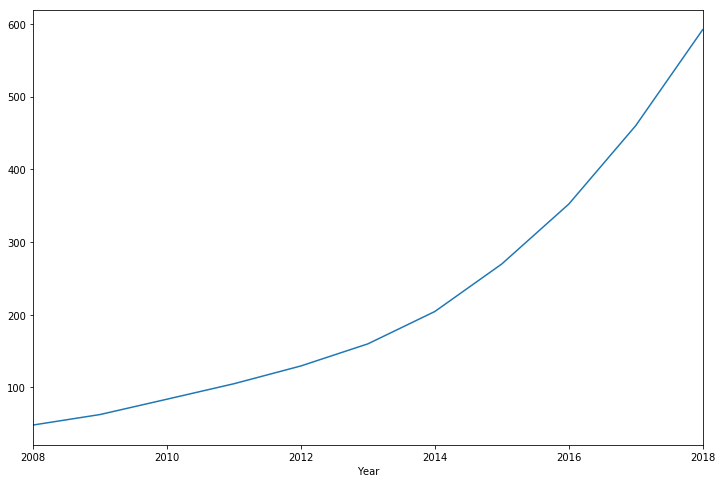

In [32]:
Variables_df['totalEvCarSales'].plot.line(figsize=(12, 8))

In [33]:
Variables_df.describe()

,totalEvCarSales,Diesel,Premium Unleaded,GDP per capita in ($),Government EV subsidy in (£),UK crude oil volume (Thousand Tonnes),Charging Connectors,Carbon Monoxide (thousand tonnes),Range of Electric Vehicle (miles),Bus Fare Cost,Electricity Available (TWh),Price of New Cars,ULEZ Variable
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,8.000000,10.000000,10.000000,11.000000,11.000000,11.000000,11.0
mean,224.460909,124.000000,119.272727,42740.452727,3409.090909,107212.733182,9134.250000,1895.500000,128.800000,146.153727,349.245000,24.727273,1.0
std,177.159640,12.938315,12.321452,2901.443143,2234.034264,12346.561020,5879.874871,291.800255,57.311624,18.894316,14.294755,2.004540,0.0
min,48.370000,103.000000,99.000000,38713.140000,0.000000,93965.299000,1537.000000,1568.000000,73.000000,113.357000,333.184000,21.000000,1.0
25%,94.550000,115.500000,109.500000,40717.795000,1750.000000,98364.332000,5010.000000,1732.750000,81.750000,132.072500,337.953000,23.500000,1.0
50%,160.030000,120.000000,117.000000,42462.710000,4500.000000,103675.038000,8955.000000,1848.000000,116.000000,150.127000,350.935000,25.000000,1.0
75%,311.090000,135.500000,130.000000,44205.330000,5000.000000,114045.170500,12350.250000,2007.000000,164.750000,161.172500,356.038000,26.000000,1.0
max,592.200000,141.000000,135.000000,47417.640000,5000.000000,132123.696000,19118.000000,2555.000000,244.000000,170.979000,378.202000,28.000000,1.0


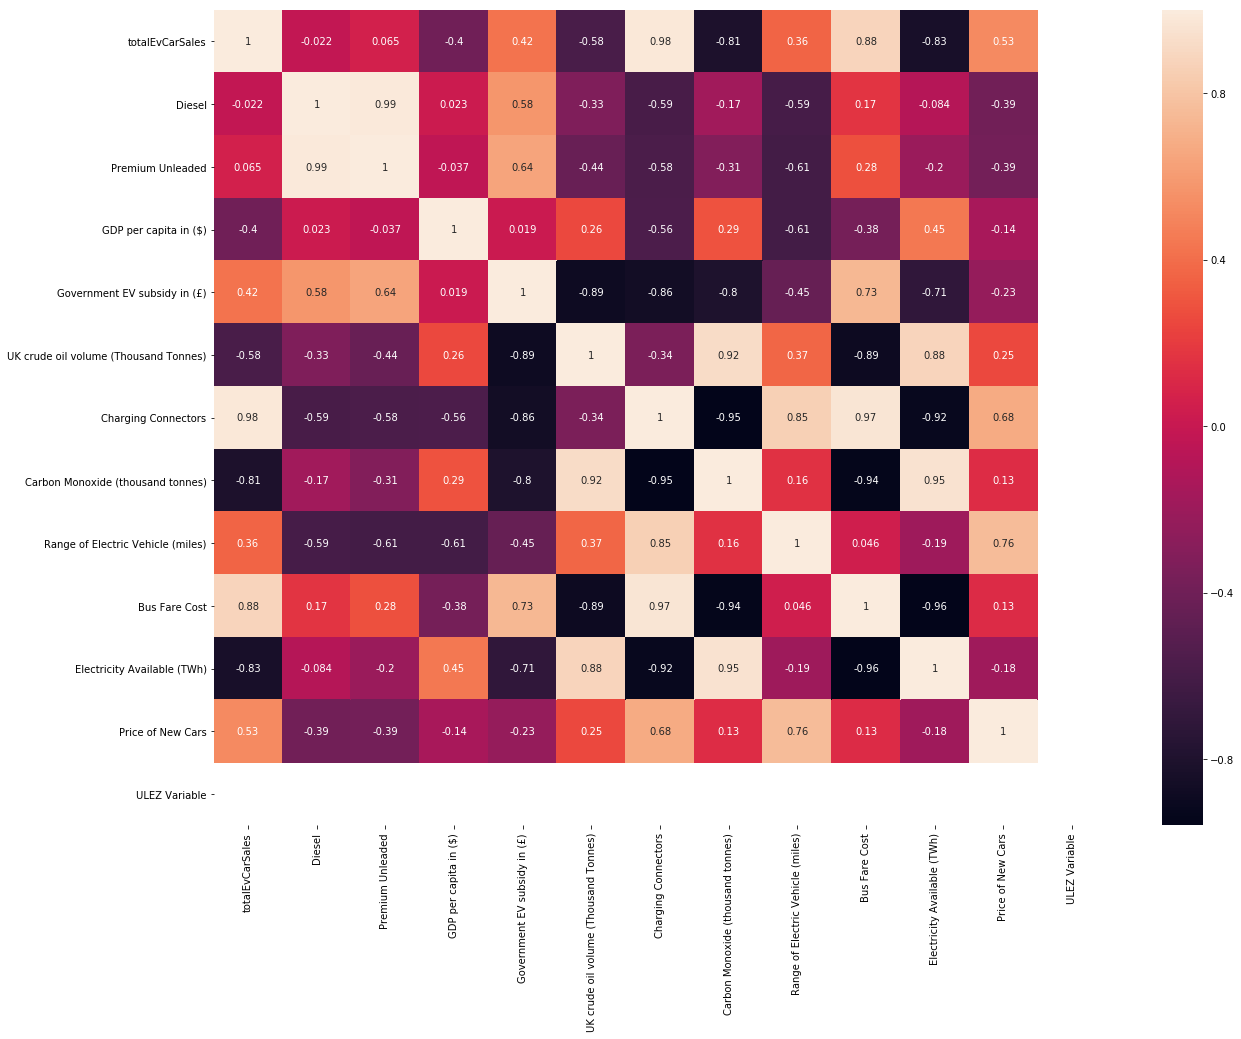

In [34]:
corrMatrix = Variables_df.corr()
plt.subplots(figsize=(20,15))
sn.heatmap(corrMatrix, annot=True)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Variables_df)
scaledVariables_df = scaler.transform(Variables_df)
dfScaled = pd.DataFrame(scaledVariables_df)
dfScaled.columns = Variables_df.columns.values
dfScaled.index = Variables_df.index.values
dfScaled.index.name = 'Year'
dfScaled = dfScaled.fillna(0)
dfScaled

C:\Users\Kiran\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Kiran\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64, object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


,totalEvCarSales,Diesel,Premium Unleaded,Disposable income,GBP/USD exchange rate,GDP per capita in ($),Government EV subsidy in (£),UK crude oil volume (Thousand Tonnes),UK average inflation rate,Charging Connectors,Carbon Monoxide (thousand tonnes),Range of Electric Vehicle (miles),Bus Fare Cost,Electricity Available (TWh),Price of New Cars,ULEZ Variable
Year,,,,,,,,,,,,,,,,
2008,-1.042482,-0.567436,-1.044661,0.078096,2.065509,1.643478,-1.600461,2.116123,1.045849,0.000000,2.382363,0.000000,-1.820521,2.124581,0.665912,0.0
2009,-0.956995,-1.702307,-1.725626,-1.441854,0.237415,-1.194546,-1.600461,1.358146,-1.000025,0.000000,0.854327,2.118793,-1.280916,0.654609,0.665912,0.0
2010,-0.832021,-0.405311,-0.278576,-0.854389,0.106837,-0.100398,-1.600461,0.918527,1.134800,0.000000,0.565337,-0.823975,-0.954799,1.111705,-0.903738,0.0
2011,-0.706159,1.134871,1.168473,-0.734332,0.433282,1.690702,0.746882,0.242269,-1.948837,-1.381288,-0.084891,-1.026290,-0.608477,0.342199,0.142695,0.0
2012,-0.561293,1.378058,1.338714,-0.956962,0.367993,-0.602325,0.746882,-0.184864,0.497317,-1.136566,-0.167976,-0.198637,-0.155355,0.332440,-0.380521,0.0
2013,-0.381440,1.296996,1.253594,-0.744822,0.172126,0.073542,0.746882,-0.606966,-0.347718,-0.620941,-0.175200,-0.915937,0.220553,0.123996,-1.950171,0.0
2014,-0.117934,0.729560,0.657750,0.038465,0.759728,-0.859969,0.746882,-1.125336,-0.495969,-0.201496,-0.471415,-0.879152,0.476673,-0.806485,-0.903738,0.0
2015,0.269124,-0.810622,-0.704179,0.555994,-0.023741,0.804523,0.746882,-0.927253,0.897597,0.136315,-0.626747,-0.272206,0.752554,-0.706335,-0.380521,0.0
2016,0.756588,-1.134871,-0.959541,0.876535,-1.198945,0.254520,0.512148,-0.896332,-0.451494,0.475035,-1.092744,-0.014714,0.914807,-0.850507,0.142695,0.0


In [36]:
dfScaled.columns

Index(['totalEvCarSales', 'Diesel', 'Premium Unleaded', 'Disposable income',
       'GBP/USD exchange rate', 'GDP per capita in ($)',
       'Government EV subsidy in (£)', 'UK crude oil volume (Thousand Tonnes)',
       'UK average inflation rate', 'Charging Connectors',
       'Carbon Monoxide (thousand tonnes)',
       'Range of Electric Vehicle (miles)', 'Bus Fare Cost',
       'Electricity Available (TWh)', 'Price of New Cars', 'ULEZ Variable'],
      dtype='object')

In [66]:
y1 = dfScaled['totalEvCarSales']
x1 = dfScaled[['Diesel', 'Premium Unleaded', 'Disposable income',
       'GBP/USD exchange rate', 'GDP per capita in ($)',
       'Government EV subsidy in (£)', 'UK crude oil volume (Thousand Tonnes)',
       'UK average inflation rate']]

reg_model1 = sm.OLS(y1.astype(float), x1.astype(float)) 
reg_model1.df_model
reg_model1_fit = reg_model1.fit()
reg_model1.fit().summary()

C:\Users\Kiran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        totalEvCarSales   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     42.38
Date:                Thu, 23 Apr 2020   Prob (F-statistic):            0.00531
Time:                        11:57:37   Log-Likelihood:                 10.442
No. Observations:                  11   AIC:                            -4.884
Df Residuals:                       3   BIC:                            -1.701
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Diesel                                   -0.3706      1.134     -0.327      0.765      -3.978       3.237
Premium Unleaded                          0.4584      1.118      0.410      0.709      -3.100       4.017
Disposable income                         0.7725      0.125      6.186      0.009       0.375       1.170
GBP/USD exchange rate                    -0.2500      0.216     -1.156      0.331      -0.938       0.438
GDP per capita in ($)                    -0.2362      0.104     -2.272      0.108      -0.567       0.095
Government EV subsidy in (£)              0.1624      0.253      0.642      0.567      -0.643       0.968
UK crude oil volume (Thousand Tonnes)     0.1929      0.263      0.733      0.517      -0.645       1.030
UK average inflation rate                -0.0681      0.064     -1.070      0.363      -0.271       0.134
==============================================================================
Omnibus:                        1.119   Durbin-Watson:                   3.054
Prob(Omnibus):                  0.571   Jarque-Bera (JB):                0.855
Skew:                           0.445   Prob(JB):                        0.652
Kurtosis:                       1.964   Cond. No.                         53.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
y1 = dfScaled['totalEvCarSales']
x2 = dfScaled[['Charging Connectors',
       'Carbon Monoxide (thousand tonnes)',
       'Range of Electric Vehicle (miles)', 'Bus Fare Cost',
       'Electricity Available (TWh)', 'Price of New Cars', 'ULEZ Variable']]

reg_model2 = sm.OLS(y1.astype(float), x2.astype(float)) 
reg_model2.df_model
reg_model2_fit = reg_model2.fit()
reg_model2.fit().summary()

C:\Users\Kiran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        totalEvCarSales   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     85.10
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           7.19e-05
Time:                        11:57:40   Log-Likelihood:                 9.8890
No. Observations:                  11   AIC:                            -7.778
Df Residuals:                       5   BIC:                            -5.391
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Charging Connectors                   0.2854      0.109      2.623      0.047       0.006       0.565
Carbon Monoxide (thousand tonnes)     0.0141      0.143      0.098      0.925      -0.354       0.382
Range of Electric Vehicle (miles)    -0.0466      0.083     -0.561      0.599      -0.260       0.167
Bus Fare Cost                         1.0115      0.209      4.848      0.005       0.475       1.548
Electricity Available (TWh)           0.2958      0.220      1.344      0.237      -0.270       0.861
Price of New Cars                     0.3301      0.071      4.630      0.006       0.147       0.513
ULEZ Variable                              0          0        nan        nan           0           0
==============================================================================
Omnibus:                        0.538   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.764   Jarque-Bera (JB):                0.523
Skew:                          -0.397   Prob(JB):                        0.770
Kurtosis:                       2.285   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [68]:
def scatter_plot(x1name, x2name, title):
    x1 = Variables_df[x1name]
    x2 = Variables_df[x2name]
    y = Variables_df['totalEvCarSales']

    fig = plt.figure(figsize=(20, 8))

    ax1 = fig.add_subplot(121) #rows, columns, placement (so this creates 1 row, 2 columns and is the first plot)
    ax2 = fig.add_subplot(122) #second plot

    ax1.scatter(x1, y1, color='#0000ff')
    ax1.set(xlabel=x1name, ylabel="Total Electric Car Sales")

    ax2.scatter(x2, y1, color='#ff0000')
    ax2.set(xlabel=x2name, ylabel="Total Electric Car Sales")

    fig.suptitle(title, fontsize=24)

    plt.show()

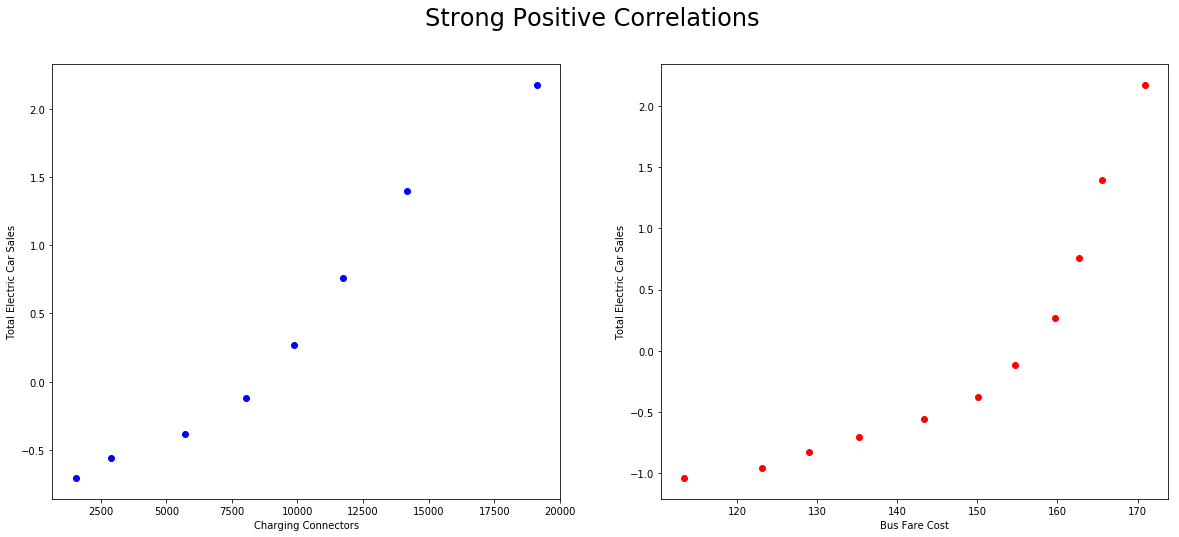

In [69]:
scatter_plot('Charging Connectors', 'Bus Fare Cost', 'Strong Positive Correlations')

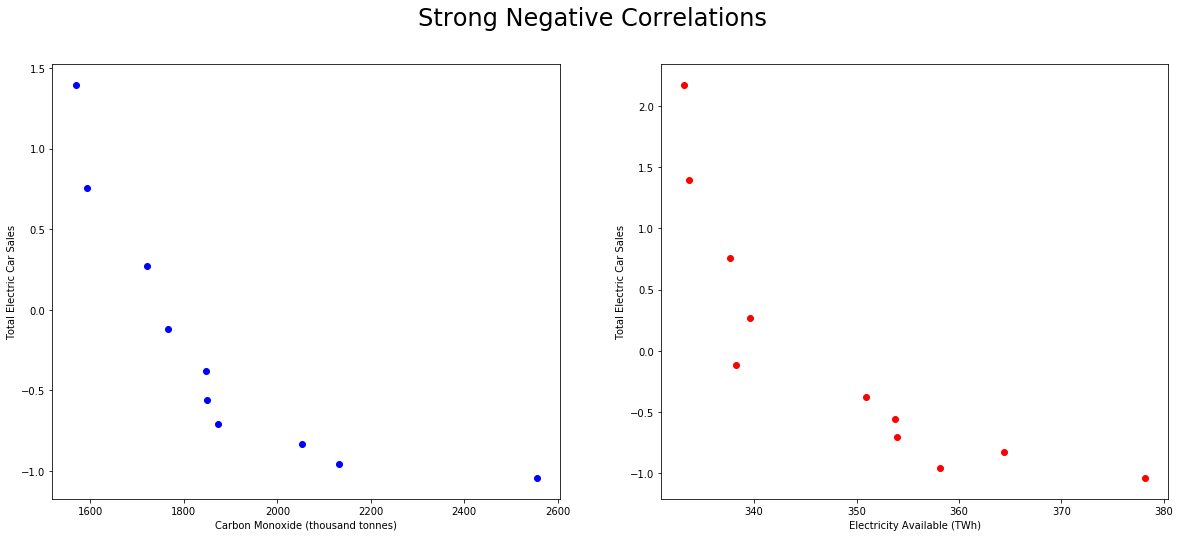

In [70]:
scatter_plot('Carbon Monoxide (thousand tonnes)', 'Electricity Available (TWh)', 'Strong Negative Correlations')

In [96]:
def dot_whisk_plot(model, series):
    series = model.params - model.conf_int()[0]
    coef_df = pd.DataFrame({'Coefficient': model.params.values[1:],
                        'Error Term': series.values[1:],
                        'Variable': series.index.values[1:]
                       })
    coef_df
    
    fig, ax = plt.subplots(figsize=(14, 6))
    coef_df.plot(x='Variable', y='Coefficient', kind='bar', 
                 ax=ax, color='blue', 
                 yerr='Error Term', legend=False)
    ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
               marker='s', s=120, 
               y=coef_df['Coefficient'], color='black')
    ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
    ax.xaxis.set_ticks_position('none')

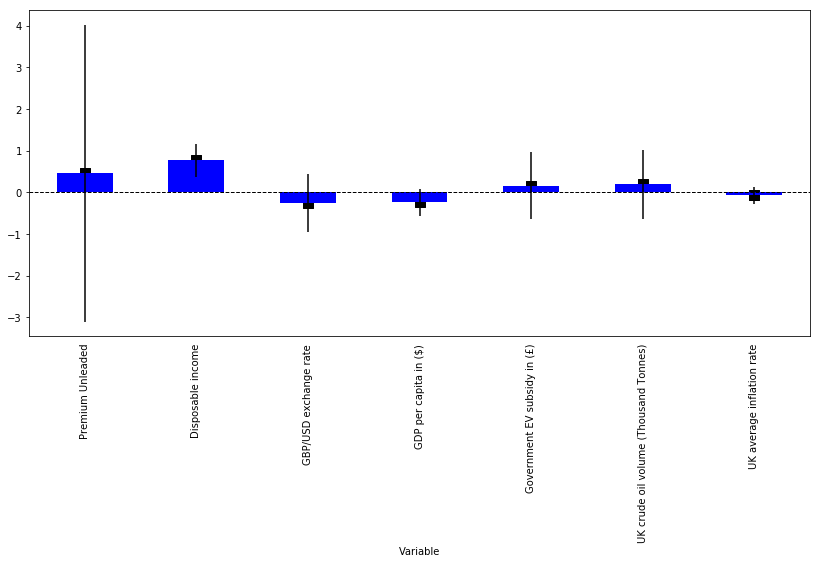

In [97]:
dot_whisk_plot(reg_model1_fit, err_series1)

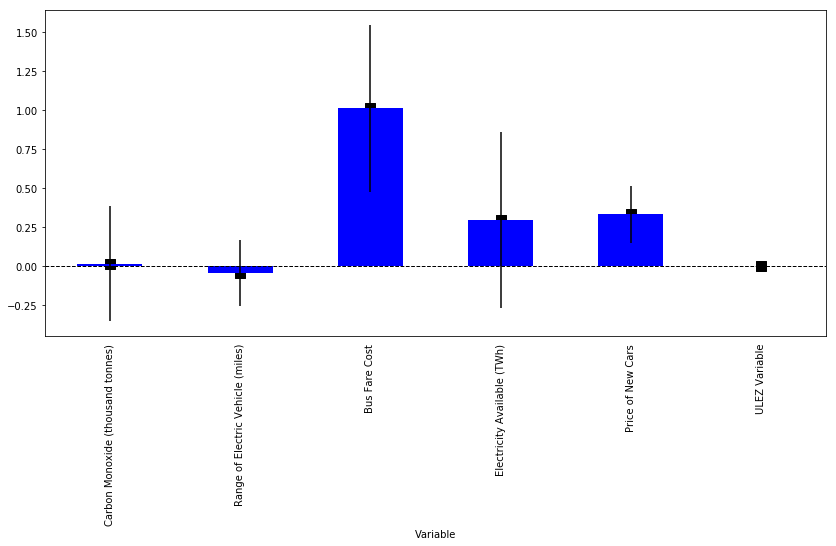

In [98]:
dot_whisk_plot(reg_model2_fit, err_series2)